In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from Wind.Results import DBResults
from plotly.offline import init_notebook_mode
init_notebook_mode(connected=True)
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
import seaborn as sns
from Wind.Private.DBConfig import mongolocaltest, mongolocal
import matplotlib.pyplot as plt

# Fitting RNN Encoder Decoder separated dependent variables

## Fit 1

fit of RNN, explore lag, decoder/encoder neurons, dropout and encoder layers

In [3]:
query={'experiment':'rnneds2sdepfit'}

results = DBResults(conn=mongolocaltest)
#results = DBResults()

results.retrieve_results_dataframe(query, arch=['neuronsD', 'neuronsE','nlayersE','nlayersD', 'drop'], data=['lag'])

In [4]:
a=results.exp_df.groupby(['site', 'drop', 'neuronsD', 'lag','nlayersE','nlayersD', 'neuronsE'],as_index=False).sum()
a.drop(columns=['hour', 'site'], inplace=True)
len(a)

6400

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f88e055f9b0>,
      dtype=object)

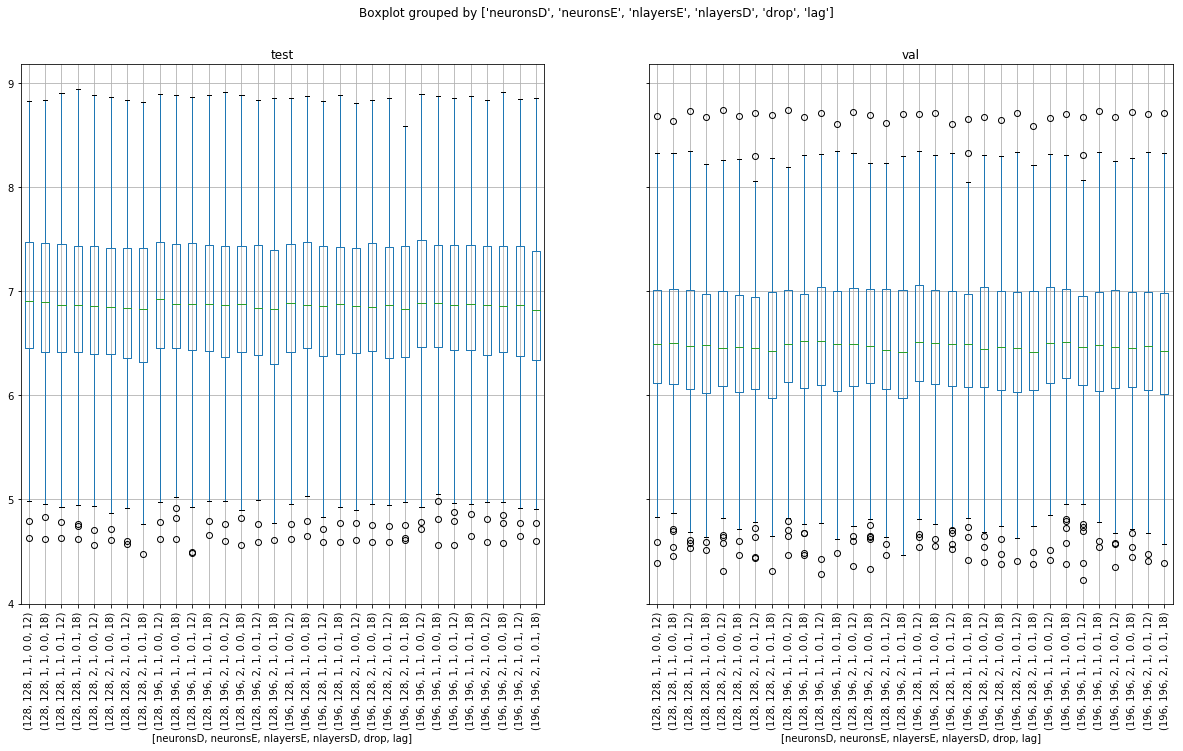

In [5]:
a.boxplot(by=['neuronsD', 'neuronsE',  'nlayersE','nlayersD', 'drop', 'lag' ],figsize=(20,10), rot=90)

In [6]:
b =a.groupby(by=['neuronsD', 'neuronsE',  'nlayersE','nlayersD', 'drop', 'lag' ],as_index=False).mean()
b.style.highlight_max()

,neuronsD,neuronsE,nlayersE,nlayersD,drop,lag,test,val
0,128,128,1,1,0.0,12,6.86731,6.54547
1,128,128,1,1,0.0,18,6.86402,6.52998
2,128,128,1,1,0.1,12,6.84258,6.51958
3,128,128,1,1,0.1,18,6.83488,6.50503
4,128,128,2,1,0.0,12,6.83336,6.51264
5,128,128,2,1,0.0,18,6.83124,6.49946
6,128,128,2,1,0.1,12,6.81983,6.48369
7,128,128,2,1,0.1,18,6.81251,6.48094
8,128,196,1,1,0.0,12,6.87084,6.54082
9,128,196,1,1,0.0,18,6.8695,6.53494


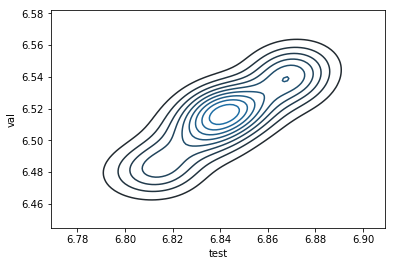

In [7]:
sns.kdeplot(b['test'],b['val'])

final best configuration

In [8]:
a.groupby(by=['neuronsD', 'neuronsE',  'nlayersE', 'drop', 'lag' ],as_index=False).count()


,neuronsD,neuronsE,nlayersE,drop,lag,nlayersD,test,val
0,128,128,1,0.0,12,200,200,200
1,128,128,1,0.0,18,200,200,200
2,128,128,1,0.1,12,200,200,200
3,128,128,1,0.1,18,200,200,200
4,128,128,2,0.0,12,200,200,200
5,128,128,2,0.0,18,200,200,200
6,128,128,2,0.1,12,200,200,200
7,128,128,2,0.1,18,200,200,200
8,128,196,1,0.0,12,200,200,200
9,128,196,1,0.0,18,200,200,200


## Fit 2

In [9]:
query={'experiment':'rnneds2sdepfit2'}

results = DBResults(conn=mongolocaltest)
#results = DBResults()

results.retrieve_results_dataframe(query, arch=['neuronsD', 'neuronsE','nlayersE','nlayersD', 'drop'], data=['lag'])

In [10]:
a=results.exp_df.groupby(['site', 'drop', 'neuronsD', 'lag','nlayersE','nlayersD', 'neuronsE'],as_index=False).sum()
a.drop(columns=['hour', 'site'], inplace=True)
len(a)

19200

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f88cc9feba8>,
      dtype=object)

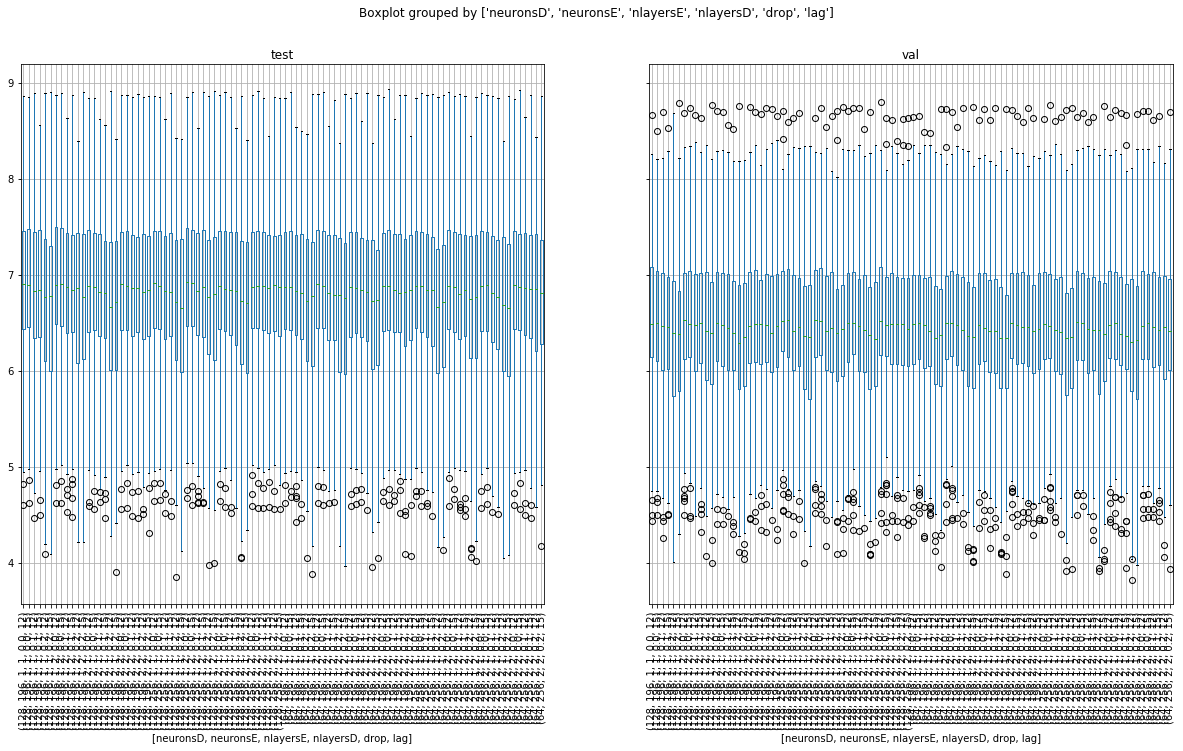

In [11]:
a.boxplot(by=['neuronsD', 'neuronsE',  'nlayersE','nlayersD', 'drop', 'lag' ],figsize=(20,10), rot=90)

In [19]:
b =a.groupby(by=['neuronsD', 'neuronsE',  'nlayersE','nlayersD', 'drop', 'lag' ],as_index=False).mean()
b[b['test']>6.86].style.highlight_max()

,neuronsD,neuronsE,nlayersE,nlayersD,drop,lag,test,val
0,128,196,1,1,0.0,12,6.87536,6.54526
1,128,196,1,1,0.0,15,6.8738,6.54675
6,128,196,1,2,0.0,12,6.87372,6.5461
7,128,196,1,2,0.0,15,6.87394,6.54514
24,128,256,1,1,0.0,12,6.86978,6.54976
25,128,256,1,1,0.0,15,6.86984,6.54616
30,128,256,1,2,0.0,12,6.87547,6.5507
31,128,256,1,2,0.0,15,6.87457,6.55185
48,64,196,1,1,0.0,12,6.86095,6.53572
54,64,196,1,2,0.0,12,6.86611,6.54842


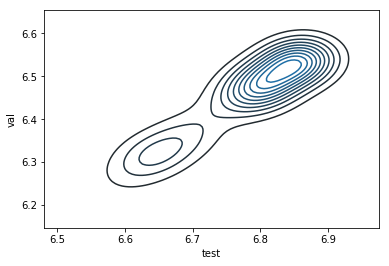

In [13]:
sns.kdeplot(b['test'],b['val'])
#sns.kdeplot(a['test'],a['val'])

In [14]:
a.groupby(by=['neuronsD', 'neuronsE',  'nlayersE','nlayersD', 'drop', 'lag'  ],as_index=False).count()


,neuronsD,neuronsE,nlayersE,nlayersD,drop,lag,test,val
0,128,196,1,1,0.0,12,200,200
1,128,196,1,1,0.0,15,200,200
2,128,196,1,1,0.1,12,200,200
3,128,196,1,1,0.1,15,200,200
4,128,196,1,1,0.2,12,200,200
5,128,196,1,1,0.2,15,200,200
6,128,196,1,2,0.0,12,200,200
7,128,196,1,2,0.0,15,200,200
8,128,196,1,2,0.1,12,200,200
9,128,196,1,2,0.1,15,200,200


## Fit 3

In [9]:
query={'experiment':'rnneds2sdepfit3'}

results = DBResults(conn=mongolocaltest)
#results = DBResults()

results.retrieve_results_dataframe(query, arch=['neuronsD', 'neuronsE','nlayersE','nlayersD', 'drop','activation'], data=['lag'])

In [10]:
a=results.exp_df.groupby(['site', 'drop', 'neuronsD', 'lag','nlayersE','nlayersD', 'neuronsE','activation'],as_index=False).sum()
a.drop(columns=['hour', 'site'], inplace=True)
len(a)

45459

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f7fc90f3e48>,
      dtype=object)

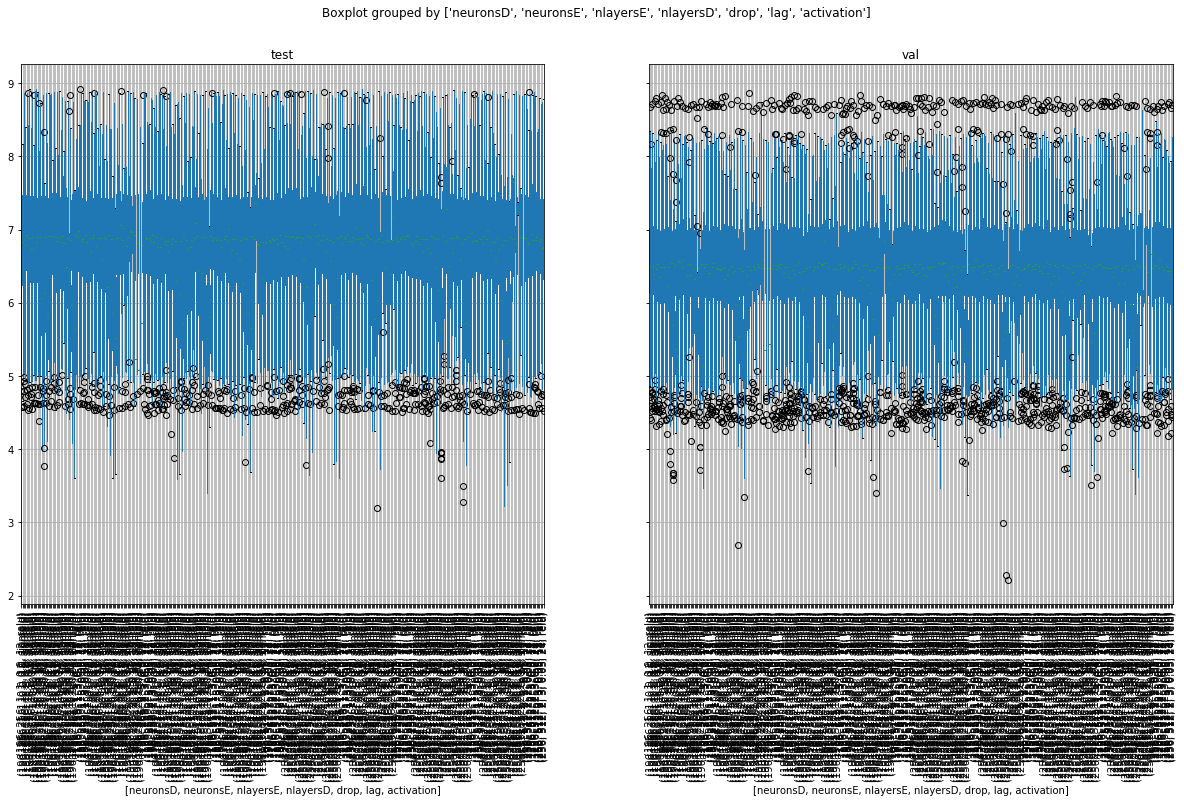

In [5]:
a.boxplot(by=['neuronsD', 'neuronsE',  'nlayersE','nlayersD', 'drop', 'lag','activation' ],figsize=(20,10), rot=90)

In [6]:
b =a.groupby(by=['neuronsD', 'neuronsE',  'nlayersE','nlayersD', 'drop', 'lag','activation' ],as_index=False).mean()
b[b['test']>6.86].style.highlight_max()

,neuronsD,neuronsE,nlayersE,nlayersD,drop,lag,activation,test,val
0,196,256,1,1,0.0,12,relu,6.86937,6.55621
2,196,256,1,1,0.0,15,relu,6.8931,6.56493
4,196,256,1,1,0.0,18,relu,6.87142,6.53323
6,196,256,1,1,0.0,21,relu,6.86795,6.54446
8,196,256,1,1,0.0,24,relu,6.86602,6.53762
10,196,256,1,1,0.05,12,relu,6.87513,6.54128
12,196,256,1,1,0.05,15,relu,6.86953,6.53934
14,196,256,1,1,0.05,18,relu,6.8653,6.54954
16,196,256,1,1,0.05,21,relu,6.87664,6.54048
18,196,256,1,1,0.05,24,relu,6.87696,6.53681


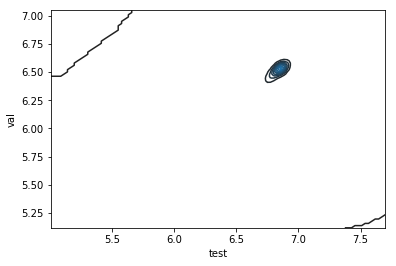

In [7]:
sns.kdeplot(b['test'],b['val'])
#sns.kdeplot(a['test'],a['val'])

In [8]:
a.groupby(by=['neuronsD', 'neuronsE',  'nlayersE','nlayersD', 'drop', 'lag','activation'  ],as_index=False).count()


,neuronsD,neuronsE,nlayersE,nlayersD,drop,lag,activation,test,val
0,196,256,1,1,0.0,12,relu,180,180
1,196,256,1,1,0.0,12,sigmoid,123,123
2,196,256,1,1,0.0,15,relu,183,183
3,196,256,1,1,0.0,15,sigmoid,115,115
4,196,256,1,1,0.0,18,relu,172,172
5,196,256,1,1,0.0,18,sigmoid,119,119
6,196,256,1,1,0.0,21,relu,185,185
7,196,256,1,1,0.0,21,sigmoid,118,118
8,196,256,1,1,0.0,24,relu,168,168
9,196,256,1,1,0.0,24,sigmoid,114,114


# Fitting RNN Encoder Decoder with attention

## Fit1

In [9]:
query={'experiment':'rnneds2satt'}

results = DBResults(conn=mongolocaltest)
#results = DBResults()

results.retrieve_results_dataframe(query, arch=['neurons', 'nlayersD','nlayersE', 'drop'], data=['lag'])

In [209]:
a=results.exp_df.groupby(['site', 'drop', 'neurons', 'lag','nlayersE', 'nlayersD'],as_index=False).sum()
a.drop(columns=['hour', 'site'], inplace=True)
len(a)

200

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f9cf286d550>,
      dtype=object)

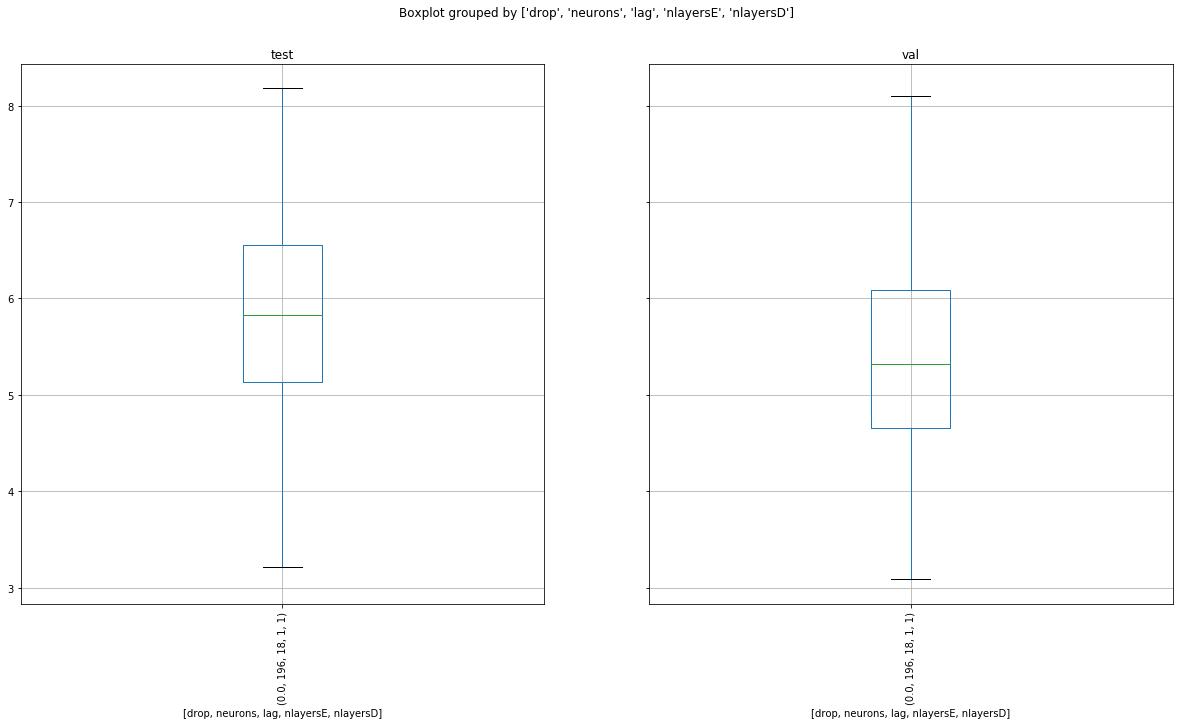

In [210]:
a.boxplot(by=[ 'drop', 'neurons', 'lag','nlayersE', 'nlayersD'],figsize=(20,10), rot=90)

In [211]:
b =a.groupby(by=[ 'drop', 'neurons', 'lag','nlayersE', 'nlayersD'],as_index=False).mean()
b.style.highlight_max()

,drop,neurons,lag,nlayersE,nlayersD,test,val
0,0.0,196,18,1,1,5.80838,5.34584


In [212]:
a.groupby(by=[ 'drop', 'neurons', 'lag','nlayersE', 'nlayersD'],as_index=False).count()

,drop,neurons,lag,nlayersE,nlayersD,test,val
0,0.0,196,18,1,1,200,200
